In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading Data

In [3]:
data = pd.read_csv("B:\\file\\train.csv")
data.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data preprocessing

In [4]:
data_int= data.select_dtypes(include=["int"])

In [5]:
#null values 
print (data_int.isnull().sum()) 

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


In [6]:
# Duplicae values
print(data_int.duplicated().sum())

0


## Feature Selection

In [7]:
correlation = data_int.corr()
target_correlation= data_int.corrwith(data_int["SalePrice"])


In [8]:
import seaborn as sns

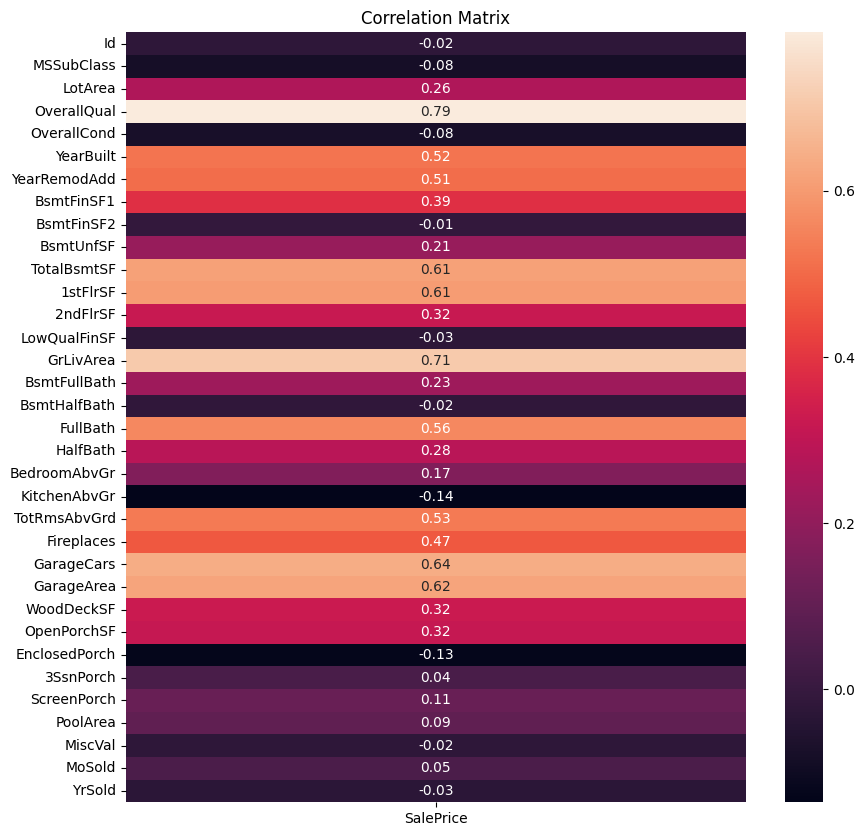

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation[['SalePrice']].drop('SalePrice'), annot = True, fmt=".2f" )
plt.title('Correlation Matrix')
plt.show()

In [10]:
# selecting Features 
Features = ['OverallQual' ,'FullBath' ,  'GrLivArea' , 'OverallCond', 'BedroomAbvGr','GarageArea', 'MSSubClass']
x = data_int[Features]
y = data_int['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=42)

## Model Selection 

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [12]:
y_pred =model.predict(x_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 1631502691.8640516


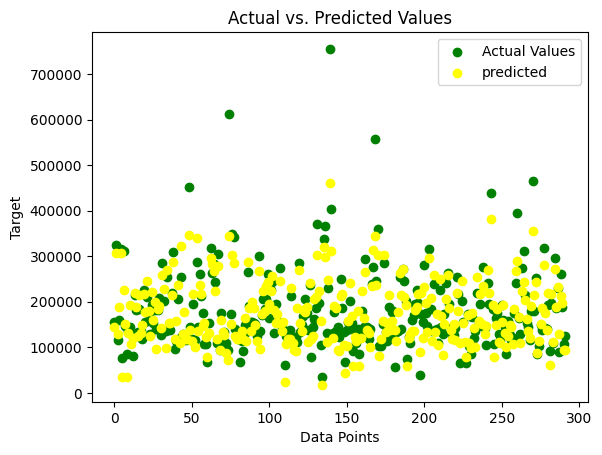

In [18]:

# Create a scatter plot for the original values
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual Values')
plt.scatter(range(len(y_test)), y_pred, color='yellow', label='predicted')
plt.xlabel("Data Points")
plt.ylabel("Target")
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
